0# **Caso de estudio: BELLABEAT**
## **Introducción**
Bienvenidos a mi primer portafolio. Usaré el caso de estudio “BELLABEAT” para realizar el proyecto final del “Professional Data Analytics Certificate”, curso ofrecido por Google. 
Tomare el papel de analista de datos Junior que hace poco ingreso al equipo de marketing de la empresa BELLABEAT, una empresa enfocada en la fabricación de dispositivos inteligentes que monitorean distintas métricas enfocadas hacia la salud femenina principalmente.
**A tener en consideración**
## **Stakeholders o partes interesadas**
* Urška Sršen: Bellabeat co-fundadora y directora creativa
* Sando Mur: Matemático y cofundador de Bellabeat; miembro clave del equipo ejecutivo de Bellabeat

## **Ask phase**
¿Cuál es el problema que estamos intentando resolver?
Se que las partes interesadas están buscando un crecimiento en una empresa que maneja mucha información, también hay una tendencia creciente a cuidar nuestra salud a través de la tecnología, por lo que algunas preguntas para responder al final del proyecto deben ser enfocadas a:
* ¿Cuáles son las tendencias en el uso de dispositivos inteligentes?
  * ¿Como esas tendencias podrían afectan a los clientes de BELLABEAT?
    * ¿Como esas tendencias pueden influenciar la estrategia de marketing de BELLABEAT?
### Businnes task
Proponer un análisis lógico partiendo de datos recopilados por los dispositivos inteligentes BellaBeat que permitan identificar las oportunidades para el crecimiento de la empresa, iniciando por las tendencias del mercado, el comportamiento del cliente y las necesidades emergentes para desarrollar campañas de marketing dirigidas hacia clientes potenciales de la mejor manera posible

## **Prepare Phase**
Se realizo la extracción de datos del repositorio de dominio público de Kaggle: <https://www.kaggle.com/datasets/arashnic/fitbit>
Inicialmente como analista de datos opté por guardarlos en mi computadora en forma de .csv en un formato largo y realizar las diferentes fases del análisis desde la herramienta RStudio, la plataforma de desarrollo del lenguaje de programación de R.  

**Análisis ROCCC**
¿Es buena nuestra fuente de datos?
* Confiable:  Son datos que están incompletos al tener una muestra demasiado pequeña, podría haber una parcialidad en los datos. En el futuro se propone la recopilación de más datos para poder generar conclusiones acertadas.
* Original:  Los datos provienen de una fuente original, ya que son recopilados por la misma empresa
* Comprensible: Existen suficientes datos y métricas medidas por la empresa para extraer conclusiones enfocadas en la “Business task”
* Actual: Los datos son del 2016, esta desactualizada. 
* Cita: Proviene de fuentes confiables


## **Process Phase**
En esta fase se quiere asegurar la integridad en los datos.
Inicialmente se hizo una seleccion de los conjuntos de datos más relevantes para la investigación de la base de datos original. Posteriormente se realizo una limpieza y union de los datos.

#### **Importamos librerias necesarias para el analisis**

In [1]:
library(tidyverse)
library(readr)
library(dplyr)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### **Leemos los conjuntos de datos correspondientes**

In [2]:
peso_log1 <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
calorias_hora <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
sueño <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
actividad_diaria <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

#### **Previsualizacion de los datos**
Iniciamos dandonos una idea del tipo de datos de los datasets, numero de columnas y posibles variables que se encaminen hacia la "businness task"

In [3]:
head(peso_log1,5)
head(calorias_hora,5)
head(sueño,5)
head(actividad_diaria,5)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863


Observamos que las columnas que indican fechas en todas las tablas tienen formato < chr > por lo que debemos transformarlos. Lo haremos más adelante...

#### **¿Cuantas observaciones comprende cada conjunto de datos?**
Con la funcion n_distinct podemos deducir:
* Los conjuntos de datos tienen diferentes cantidad de observaciones unicas dadas por un Id
* En el caso de peso_log1 se encuentra que solo existen 8 personas registradas, por lo cual las conclusiones extraidas pierden confiabilidad

In [4]:
a1 <- n_distinct(peso_log1$Id)
a3 <- n_distinct(calorias_hora$Id)
a4 <- n_distinct(sueño$Id)
a5 <- n_distinct(actividad_diaria$Id)
cant_muestra <- c(a1, a3, a4, a5)
datos <- c("peso", "calorias hora", "sueño", "actividad diaria")
tablaa <- data.frame(datos, cant_muestra)
print(tablaa)

             datos cant_muestra
1             peso            8
2    calorias hora           33
3            sueño           24
4 actividad diaria           33


### **Adecuando formatos y limpieza**
#### **1. Fechas**
Convertimos al formato de tiempo y en el caso de Calorias_hora, creamos la distincion entre dia y hora

In [5]:
fecha_datetime <- lubridate::mdy_hms(peso_log1$Date)
peso_log1$Date <- lubridate::date(fecha_datetime) 

fecha_datetime2 <- lubridate::mdy_hms(sueño$SleepDay)
sueño$SleepDay <- lubridate::date(fecha_datetime2)

fecha_datetime3 <- lubridate::mdy(actividad_diaria$ActivityDate)
actividad_diaria$ActivityDate <- lubridate::date(fecha_datetime3)

fecha_datetime4 <- lubridate::mdy_hms(calorias_hora$ActivityHour)
fecha <- lubridate::date(fecha_datetime4)
hora <- format(fecha_datetime4, "%H:%M:%S")
calorias_hora <- data.frame(calorias_hora, fecha, hora)

#### **2. Buscamos duplicados y los eliminamos**

In [6]:
sum(duplicated(peso_log1))
sum(duplicated(calorias_hora))
sum(duplicated(sueño))
sum(duplicated(actividad_diaria))

[1] 0

[1] 0

[1] 3

[1] 0

In [7]:
#Existen 3 duplicados en el conjunto de datos sueño, asi que los eliminamos
sueño <- sueño %>% 
  distinct()%>%
  drop_na()

## **Analize and Share**

#### **Relación entre pasos totales y calorias**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


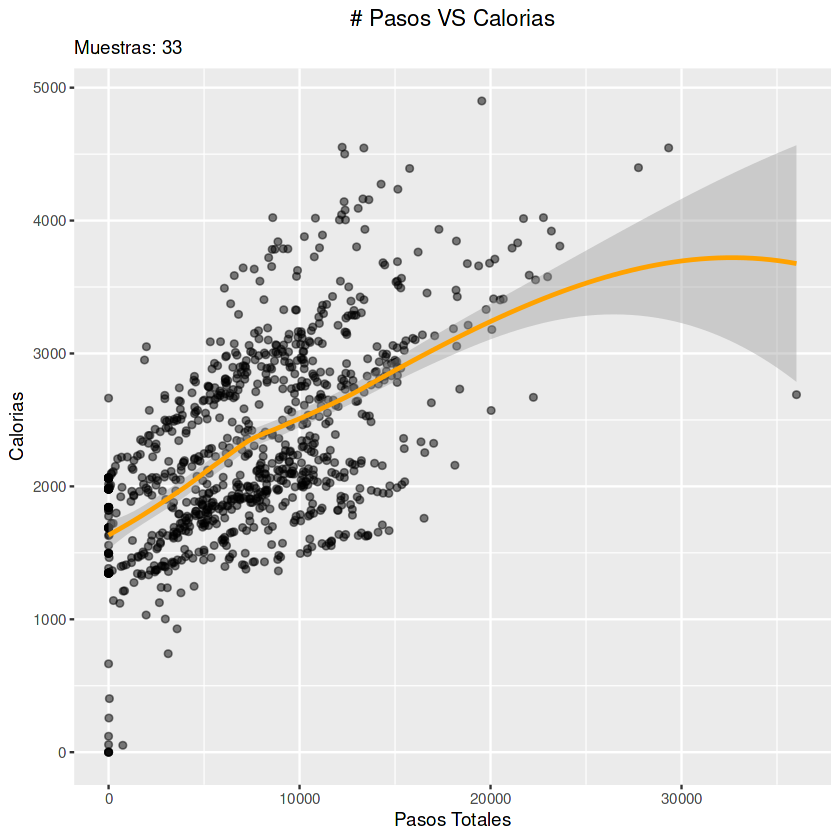

In [ ]:
ggplot(actividad_diaria)+geom_point(mapping= aes(x = TotalSteps, y= Calories), alpha = 0.5)+
  geom_smooth(mapping= aes(x = TotalSteps, y= Calories), color = "#FFA200")+ 
  ggtitle("# Pasos VS Calorias", subtitle = "Muestras: 33")+ 
  labs( x= "Pasos Totales", y="Calorias") + theme(plot.title = element_text(hjust = 0.5))

##### **analisis de correlacion, medias y desviación**

In [ ]:
actividad_diaria %>% summarise(mean(TotalSteps), mean(Calories), sd(Calories), cor(TotalSteps,Calories))

mean(TotalSteps),mean(Calories),sd(Calories),"cor(TotalSteps, Calories)"
<dbl>,<dbl>,<dbl>,<dbl>
7637.911,2303.61,718.1669,0.5915681


Existe una correlacion moderadamente positiva entre ambas variables, podemos deducir con seguridad que entre más pasos se den más calorias se queman o almenos es un factor altamente influyente

#### **Calorias en el tiempo**
Buscamos observar el comportamiento de la quema de calorias en las personas registradas con respecto al paso del tiempo, antes de eso seleccionamos las variables y agrupamos las fechas sumando las calorias totales

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


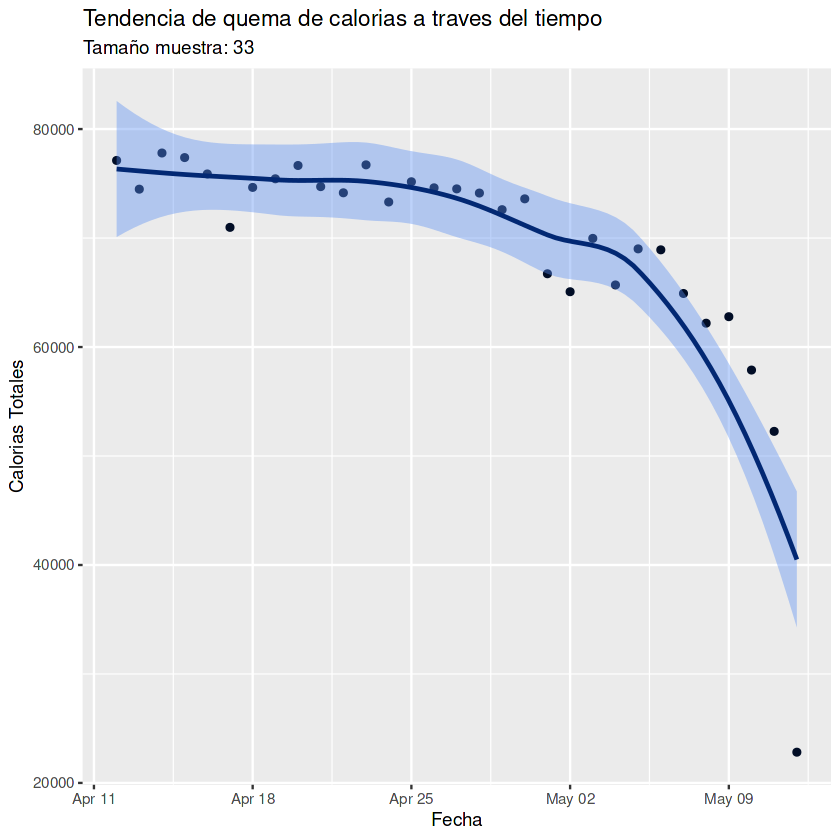

In [10]:
cal <- select(calorias_hora, "Id", "fecha", "Calories")

cal1 <- cal %>% 
  group_by(fecha) %>% 
  summarize(calorias = sum(Calories))

ggplot(cal1)+ geom_point(mapping = aes(x= fecha, y= calorias), color= "#010D26")+ 
  geom_smooth(mapping = aes(x = fecha, y= calorias), color= "#022873", fill= "#5C8EF2")+
  labs(title= "Tendencia de quema de calorias a traves del tiempo", subtitle = "Tamaño muestra: 33")+
  labs(x = "Fecha", y= "Calorias Totales")


Vemos que entre más pasa el tiempo menos calorias quemadas se observan

#### **Calorias quemadas según la hora**
Se agrupan la horas y se hace una suma de calorias como proceso previo a la la creación del grafico de barras.

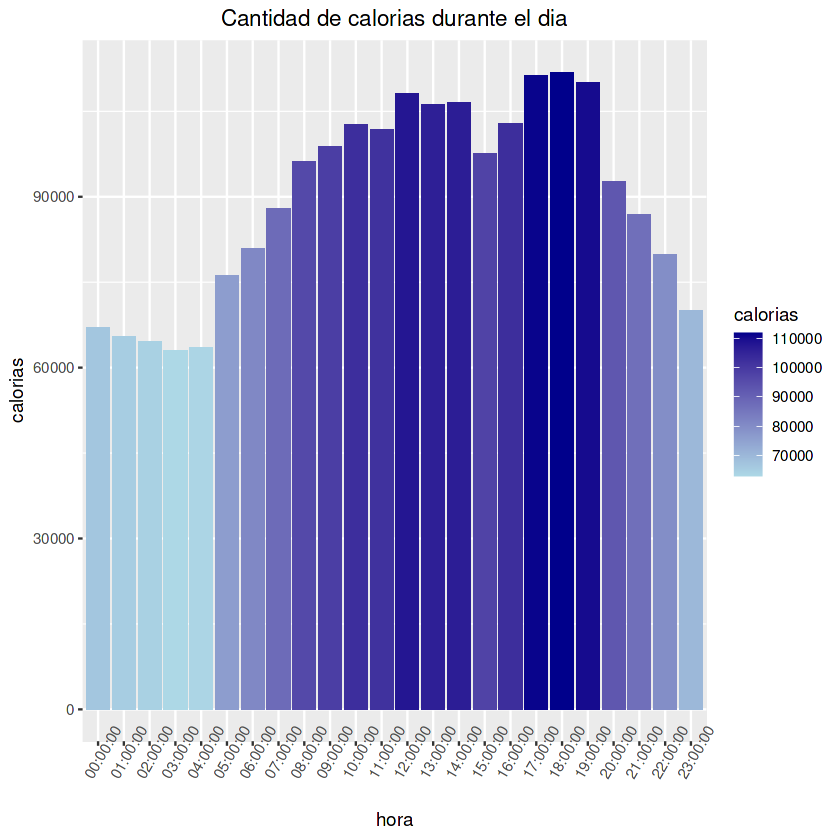

In [11]:
cal2 <- calorias_hora %>% 
  group_by(hora) %>% 
  summarize(calorias = sum(Calories))

ggplot(cal2)+ geom_col(mapping = aes(x=hora, y= calorias, fill= calorias))+
  scale_fill_gradient(low = "lightblue", high = "darkblue")+
  ggtitle ("Cantidad de calorias durante el dia") +
  theme(axis.text.x = element_text(angle = 60), plot.title = element_text(hjust = 0.5))

Vemos que las 5:00 pm es la hora en donde más se queman calorias por parte de las personas


#### **Tiempo muerto en cada dia de la semana**
Se realizó una resta entre el tiempo que se permanecia en la cama, con el que realmente se dormia. Esto para saber que tanto tiempo perdia la persona en esa fase diariamente

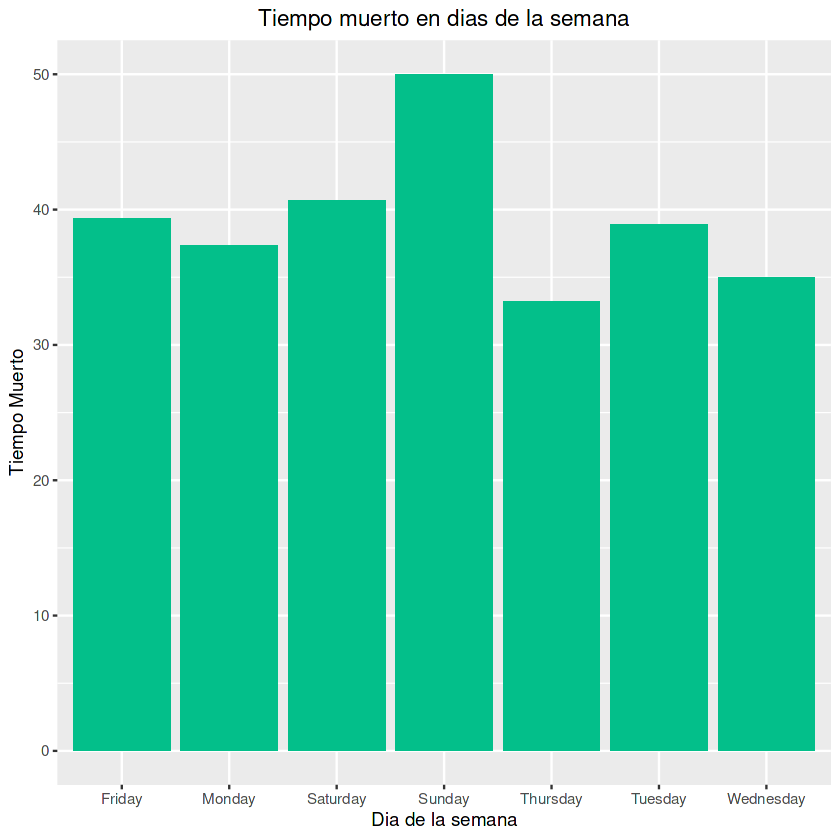

In [12]:
a7 <- sueño %>% 
  mutate(tiempo_muerto = TotalTimeInBed - TotalMinutesAsleep) %>% 
  select("Id", "SleepDay", "tiempo_muerto") %>% 
  group_by(SleepDay) %>% 
  summarise(tm = mean(tiempo_muerto))
a8 <- a7 %>% 
  mutate(dias_semana = weekdays(SleepDay)) %>% 
  group_by(dias_semana) %>% 
  summarise(tiempo_m = mean(tm))
ggplot(a8)+ geom_col(mapping = aes(x= dias_semana, y=tiempo_m), fill= "#03BF8A")+
  ggtitle("Tiempo muerto en dias de la semana")+ 
  labs(y= "Tiempo Muerto", x= "Dia de la semana")+
  theme(plot.title = element_text(hjust = 0.5))

#### **Buscamos encontrar la relacion entre el tiempo muerto y los minutos que cuya intensidad es: Sedentario**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


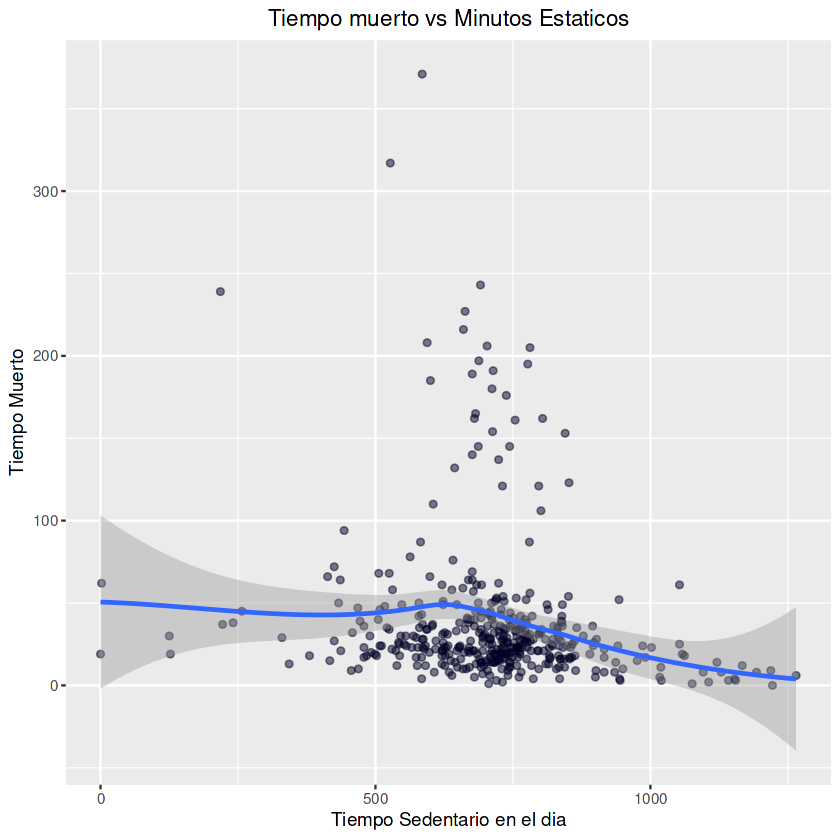

In [ ]:
a14 <- actividad_diaria %>%
  rename(SleepDay = ActivityDate)
a9 <- inner_join(sueño, a14, by = c("Id", "SleepDay"))
a15 <- a9 %>%
  mutate(tiempo_muerto = TotalTimeInBed - TotalMinutesAsleep)

ggplot(a15)+ geom_point(mapping = aes(x= SedentaryMinutes, y=tiempo_muerto), alpha =0.5, color = "#000024")+
  geom_smooth(mapping = aes(x= SedentaryMinutes, y=tiempo_muerto))+
  ggtitle("Tiempo muerto vs Minutos Estaticos")+ 
  labs(y= "Tiempo Muerto", x= "Tiempo Sedentario en el dia")+
  theme(plot.title = element_text(hjust = 0.5))

##### **Análisis de correlacion, medias y desviación**

In [ ]:
a15 %>% 
  summarise(mean(SedentaryMinutes), mean(tiempo_muerto), sd(tiempo_muerto), cor(SedentaryMinutes,tiempo_muerto))

mean(SedentaryMinutes),mean(tiempo_muerto),sd(tiempo_muerto),"cor(SedentaryMinutes, tiempo_muerto)"
<dbl>,<dbl>,<dbl>,<dbl>
712.1,39.30976,46.71093,-0.1658941


Vemos una correlación negativa debil, por lo cual podemos deducir que no existe relación entre las dos variables

#### **Creamos el esquema de la persona muestrada promedio**

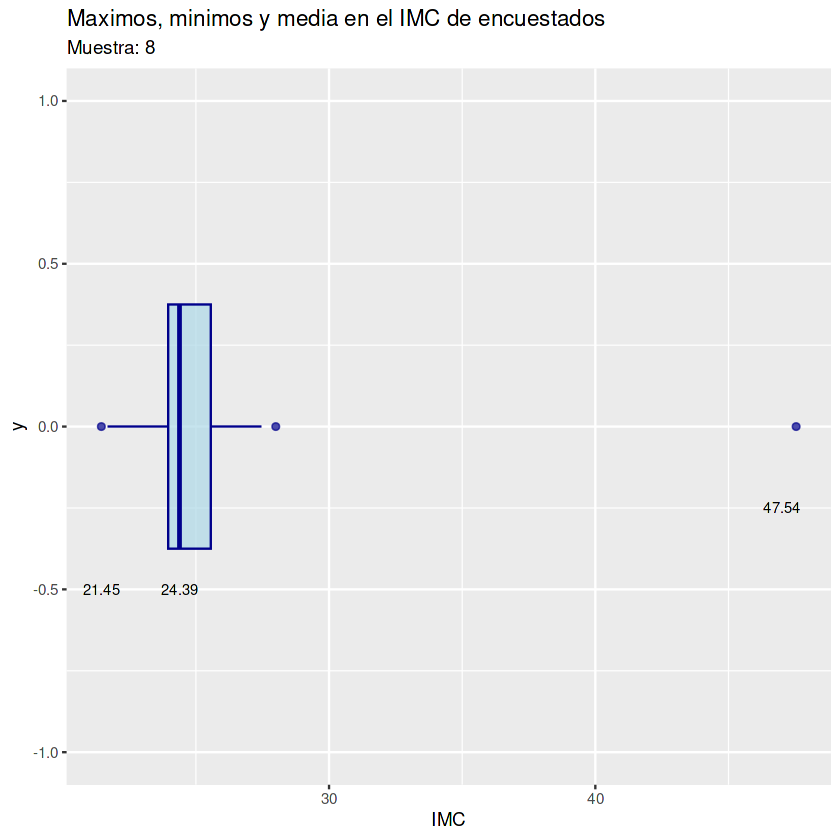

In [15]:
ggplot(peso_log1)+ geom_boxplot(mapping = aes(x= BMI), fill = "lightblue", color = "darkblue", alpha = 0.7) +
  labs(title = "Maximos, minimos y media en el IMC de encuestados", subtitle = "Muestra: 8" , x = "IMC")+
  scale_y_continuous(limits = c(-1,1))+ annotate("text",x = 47, y = -0.25, size= 3 , label = '47.54')+
  annotate("text",x = 24.39, y = -0.5, size= 3 , label = '24.39')+
  annotate("text",x = 21.45, y = -0.5, size= 3 , label = '21.45')

`summarise()` has grouped output by 'ActivityDate'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ActivityDate'. You can override using the
`.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


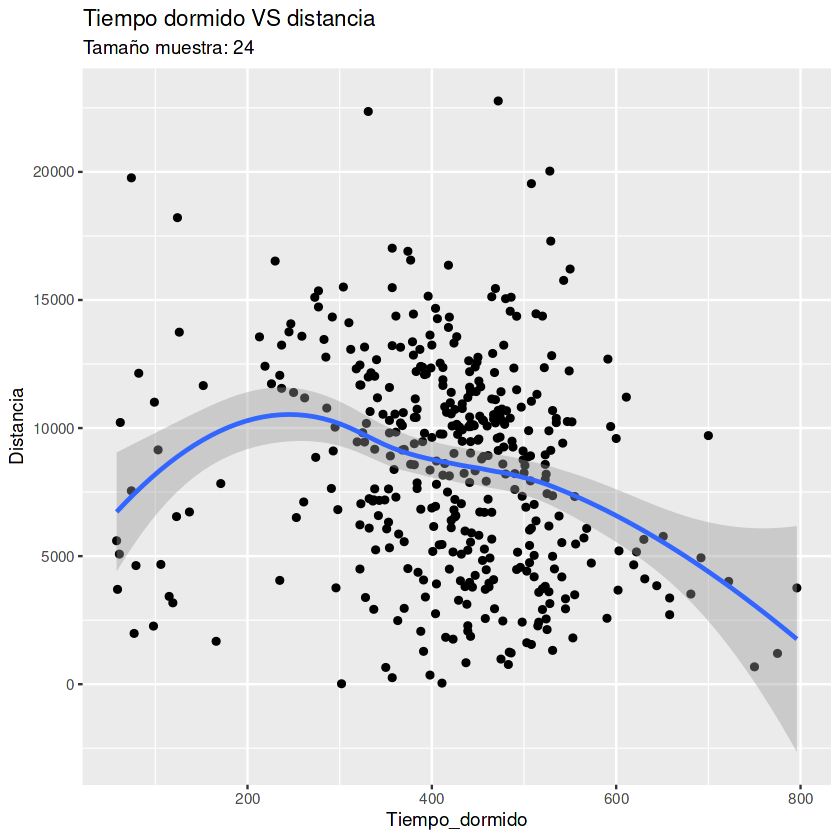

In [16]:
a11 <- actividad_diaria %>%
  select("Id", "ActivityDate", "TotalSteps") %>% 
  group_by(ActivityDate, Id) %>% 
  summarise(Distancia = sum(TotalSteps))

a12 <- sueño %>% 
  select("Id", "SleepDay", "TotalMinutesAsleep") %>% 
  rename(ActivityDate = SleepDay) %>% 
  group_by(ActivityDate, Id) %>% 
  summarise(Tiempo_dormido= sum(TotalMinutesAsleep))

a13 <- inner_join(a12, a11, by = c("Id", "ActivityDate"))

ggplot(a13)+ geom_point(mapping = aes(x= Tiempo_dormido, y = Distancia))+
  geom_smooth(mapping = aes(x= Tiempo_dormido, y = Distancia))+
  labs(title= "Tiempo dormido VS distancia", subtitle = "Tamaño muestra: 24")

##### **Análisis de correlacion, medias y desviación**

In [17]:
mean(a13$Tiempo_dormido)
mean(a13$Distancia)
sd(a13$Distancia)
cor(a13$Tiempo_dormido, a13$Distancia)

[1] 419.1732

[1] 8514.91

[1] 4157.376

[1] -0.1903439

Encontramos una correlación negativa debil, lo que significa que no existe relación entre las variables y mucho menos una causalidad entre estas mismas.

## **Resumen de conocimientos obtenidos y estrategias propuestas**
### **Conocimientos:**
1. Encontramos una relación positiva del 59% entre los pasos dados y las calorias que queman, entre más pasos, más calorias se queman.
2. Las calorias con respecto al tiempo disminuye considerablemente en el transcurso de un mes y medio aproximadamente. Surge una hipotesis que requiere de más datos para posteriores analisis: 
    * Las aplicaciones ofrecidas por la empresa no ofrecen la ayuda adecuada y los usuarios dejan de usar y registrar sus patrones
3. Las 5:00 pm es la hora más común para hacer actividad fisica
4. El domingo es el dia con más tiempo muerto (tiempo en la cama sin dormir) 
5. No existe una relación que indique la conexion entre el sedentarismo y el tiempo muerto
6. El IMC medio de los participantes es considerado normal

### **Estrategias de marketing propuestas:**
1. Una campaña publicitaria dirigida hacia los trabajadores, ya que estos tienen su tiempo libre en la tarde- noche, las horas más activas para realizar ejercicio.
2. Estrategias que inncentive el ejercicio en donde muestre lo facil y eficiente de cada dispositivo inteligente y se muestren las ventajas competitivas de sofware a la audiencia.
3. Comerciales dirigidos hacia personas con un IMC alto, en donde se genere conciencia sobre los habitos alimenticios y como nuestros productos ayudan al consumidor.
4. Proponer un proyecto de investigacion encaminado a conocer las posibles maneras de deserción por parte de la audiencia, para asi mejorar la calidad total del producto.